In [85]:
import sys; sys.path.append("../")

from vle.utils import instantiate_from_config, load_config
from vle.data.loader import CollectiveDataloader

from diffusers.models import AutoencoderKL
from diffusers import StableDiffusionPipeline

from torchmetrics import StructuralSimilarityIndexMeasure
import skimage.measure as measure
import torch.nn.functional as F

import torchvision.transforms as transforms
import torchvision
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
import scienceplots
import numpy as np

torch.set_grad_enabled(False)
plt.style.use('science')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
METRICS_FILE1 = "../vanilla_tokens12_samples500_seed2023.npy"
METRICS_FILE2 = "../vqvae_tokens12_samples500_seed2023.npy"

metrics_dict1 = np.load(METRICS_FILE1, allow_pickle=True).item()
metrics_dict2 = np.load(METRICS_FILE2, allow_pickle=True).item()
metrics_dict.keys()

dict_keys(['final_mse', 'final_ssim', 'intermediate_mse', 'intermediate_ssim', 'entropy'])

In [87]:
%config InlineBackend.figure_format="retina"

mse_metrics1 = metrics_dict1["intermediate_mse"]
mse_metrics2 = metrics_dict2["intermediate_mse"]

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax[0].violinplot(mse_metrics1, showmedians=True);
ax[1].violinplot(mse_metrics2, showmedians=True);
ax[0].set_yscale("log");
ax[0].set_xlabel("Number of Tokens"); 
ax[1].set_xlabel("Number of Tokens");
ax[0].set_ylabel("Mean Squared Error");
fig.suptitle("MSE vs. Tokens", x=0.52, y=0.94)

fig.tight_layout()

plt.savefig("vle_msextokens.pdf")

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x7fa2719545e0> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1000x400 with 2 Axes>

In [66]:
thresh = 0.003
tmp = lambda x: np.argwhere(x).min() if len(np.argwhere(x)) > 0 else n_tokens
toks = np.array([tmp(x) for x in (mses < thresh).cpu().detach().numpy()])
# plt.scatter(toks, entropies, s=1)
for i in range(n_tokens):
    zz = entropies[toks == i]
    if np.sum(toks == i) == 0: continue
    plt.errorbar(i, np.mean(zz), yerr=np.std(zz)/len(zz), c='tab:blue')
    plt.scatter(i, np.mean(zz), c='tab:blue')
plt.xlabel(f"Number of tokens to hit MSE threshold ({thresh:3f})")
plt.ylabel("Skimage Shannon Entropy")

NameError: name 'mses' is not defined

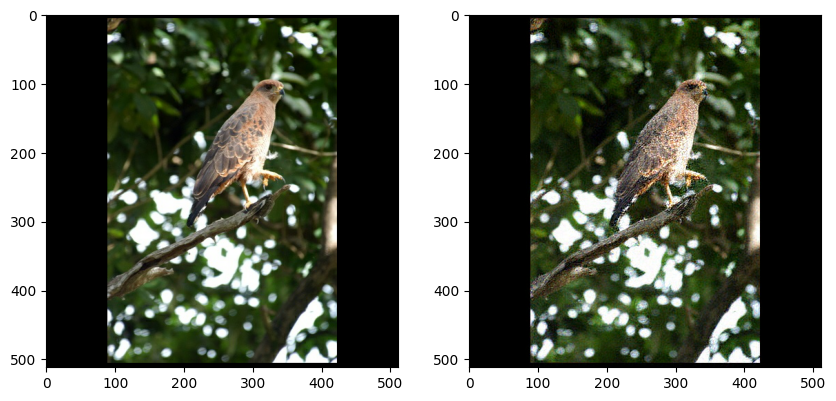

In [50]:
# sample, _ = get_single_sample(data)
# rec = vqvae_model(sample.cuda(), 5)
# rec = (rec.clamp(-1.0, 1.0) + 1.0) / 2.0 * 255
# rec = rec.moveaxis(1, -1)
# rec = rec.cpu().numpy().astype(int)

# sample = (sample.clamp(-1.0, 1.0) + 1.0) / 2.0 * 255
# sample = sample.moveaxis(1, -1)
# sample = sample.numpy().astype(int)

# _, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(sample[1])
# ax[1].imshow(rec[1])